In [70]:
#Python 3.9.13
import os
import shutil
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# Set the path to the directory containing all the class folders
data_dir = 'C:/Users/ADIB/plant/data'

# Set the paths for the train, test, and validation directories
train_dir = 'C:/Users/ADIB/plant/train'
test_dir = 'C:/Users/ADIB/plant/test'
valid_dir = 'C:/Users/ADIB/plant/validation'

# Set the desired split ratios (e.g., 80% train, 10% test, 10% validation)
train_ratio = 0.8
test_ratio = 0.1
valid_ratio = 0.1

# Get the list of class folders
class_folders = os.listdir(data_dir)

# Iterate over each class folder
for class_folder in class_folders:
    class_path = os.path.join(data_dir, class_folder)
    if os.path.isdir(class_path):
        # Get the list of image files in the class folder
        images = os.listdir(class_path)

        # Split the images into train, test, and validation sets
        train_images, test_valid_images = train_test_split(images, test_size=(1 - train_ratio))
        test_images, valid_images = train_test_split(test_valid_images, test_size=(valid_ratio / (test_ratio + valid_ratio)))

        # Create the destination directories if they don't exist
        os.makedirs(os.path.join(train_dir, class_folder), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_folder), exist_ok=True)
        os.makedirs(os.path.join(valid_dir, class_folder), exist_ok=True)

        # Move the images to their respective directories
        for image in train_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(train_dir, class_folder, image)
            shutil.copy(src, dst)

        for image in test_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(test_dir, class_folder, image)
            shutil.copy(src, dst)

        for image in valid_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(valid_dir, class_folder, image)
            shutil.copy(src, dst)


In [71]:
lst = os.listdir(valid_dir) # your directory path
number_files = len(lst)
number_files

38

VGG-16 MODEL FOR PLANTVILLAGE DATASET

In [72]:
"""
@author: OUBADRISS.ADIB
"""
from keras.layers import  Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
# re-size all the images to this
IMAGE_SIZE = [224, 224,3]
# useful for getting number of classes
folders = glob('C:/Users/ADIB/plant/train/*')

In [73]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Users/ADIB/plant/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory('C:/Users/ADIB/plant/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 42927 images belonging to 38 classes.
Found 5385 images belonging to 38 classes.


In [74]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [75]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
optimizer = SGD(learning_rate=0.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer=optimizer,
  metrics=['accuracy']
)


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [53]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\ADIB\AppData\Local\Temp\ipykernel_7512\2117205500.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
1386/1386 [==============================] - 3342s 2s/step - loss: 0.9503 - accuracy: 0.7822 - val_loss: 0.7820 - val_accuracy: 0.8184
Epoch 2/5
1386/1386 [==============================] - 3477s 3s/step - loss: 0.7496 - accuracy: 0.8239 - val_loss: 0.6585 - val_accuracy: 0.8425
Epoch 3/5
1386/1386 [==============================] - 3466s 3s/step - loss: 0.6431 - accuracy: 0.8468 - val_loss: 0.5723 - val_accuracy: 0.8587
Epoch 4/5
1386/1386 [==============================] - 3419s 2s/step - loss: 0.5705 - accuracy: 0.8622 - val_loss: 0.5209 - val_accuracy: 0.8717
Epoch 5/5
1386/1386 [==============================] - 3375s 2s/step - loss: 0.5229 - accuracy: 0.8718 - val_loss: 0.4754 - val_accuracy: 0.8824


In [44]:
len(training_set)

1386

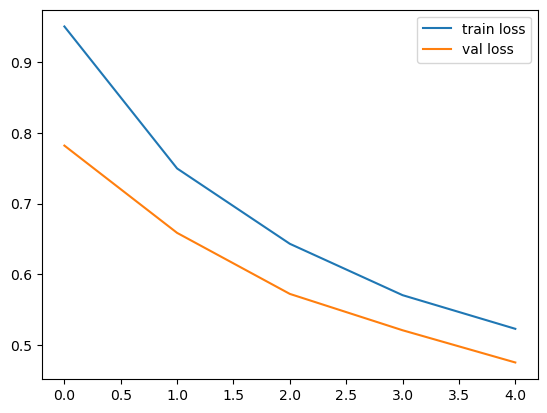

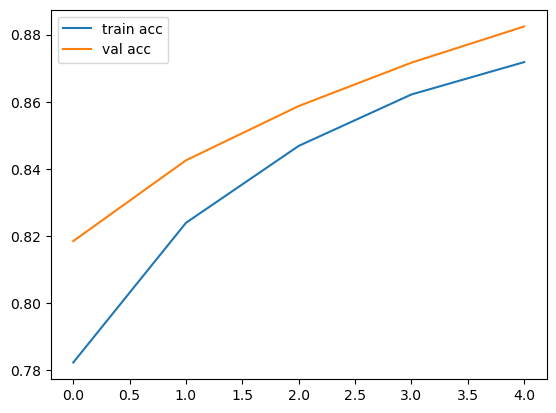

<Figure size 640x480 with 0 Axes>

In [76]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

from keras.models import load_model

model.save('new_model.h5')
